In [2]:
%%bash
cd diffusion && pip install -e .

Obtaining file:///root/diffusion
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/openai/CLIP.git (to revision a1d071733d7111c9c014f024669f959182114e33) to /tmp/pip-install-4rqboqnb/clip_48ae4b70274c49b48b5fdca0efab9c71


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-4rqboqnb/clip_48ae4b70274c49b48b5fdca0efab9c71
  Running command git rev-parse -q --verify 'sha^a1d071733d7111c9c014f024669f959182114e33'
  Running command git fetch -q https://github.com/openai/CLIP.git a1d071733d7111c9c014f024669f959182114e33
  Running command git checkout -q a1d071733d7111c9c014f024669f959182114e33


  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Building editable for diffusion (pyproject.toml): started
  Building editable for diffusion (pyproject.toml): finished with status 'done'
  Created wheel for diffusion: filename=diffusion-0.0.1-0.editable-py3-none-any.whl size=6871 sha256=8efa8bcf5313d8a27756bf79b466792d3209123b7b3c10847a899cb9feaba4d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nnox1k4/wheels/a6/35/80/f1b29192b3d04be3d2c48124d7dad1723ff43458c5575671a1
Successfully built diffusion
  Attempting uninstall: diffusion
    Found existing installation: diffusion 0.0.1
    Uninstalling diffusion-0.0.1:
      Successfully uninstalled diffusion-0.0.1


In [3]:
import diffusion
from diffusion.datasets.laion import build_streaming_laion_dataloader
diffusion.datasets.laion.__file__

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/root/diffusion/diffusion/datasets/laion/__init__.py'

In [18]:
dataloader = build_streaming_laion_dataloader(
    remote="/mds/256-512",
    local="/tmp/mds-cache3",
    batch_size=64,
    tokenizer_name_or_path="stabilityai/stable-diffusion-2-base",
    caption_drop_prob=0.1,
    resize_size=256,
    predownload=20_000,
    drop_last=False,
    shuffle=False,
    prefetch_factor=2,
    num_workers=8,
    persistent_workers=True,
    pin_memory=True,
    download_timeout=300,
)

In [19]:
gen = iter(dataloader)

In [20]:
data = next(gen)

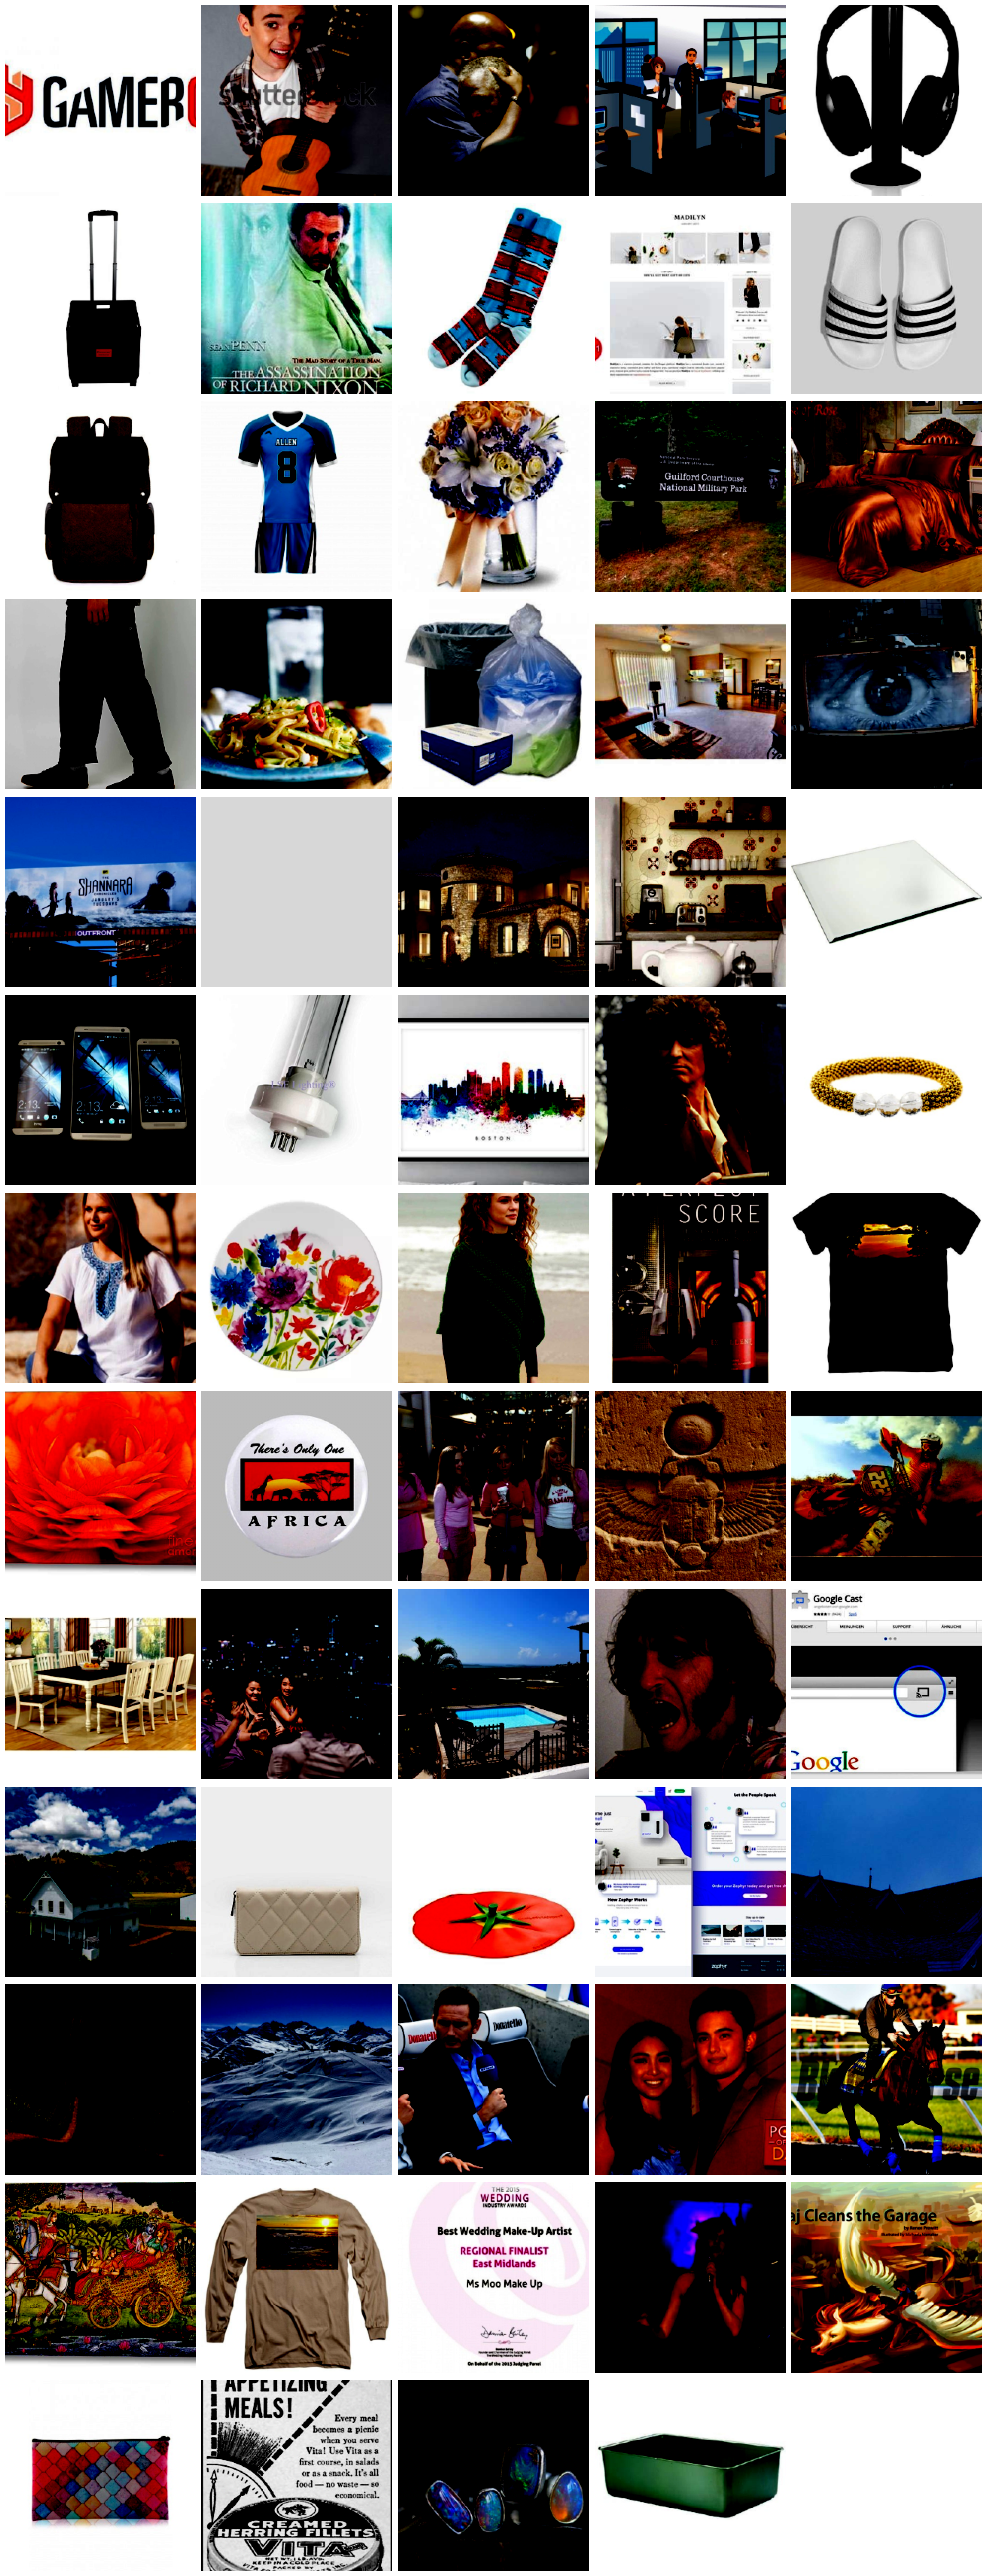

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Example tensor (replace with your actual tensor)
# Assuming the tensor shape is [batch_size, height, width, channels]
# Here we create a dummy tensor for demonstration
batch_size = 64
height, width, channels = 256, 256, 3
images_tensor = data["image"]

def display_image_batch(images_tensor, cols=5):
    batch_size = images_tensor.shape[0]
    rows = (batch_size + cols - 1) // cols  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()  # Flatten to easily iterate
    
    for i in range(len(axes)):
        if i < batch_size:
            # Clip values between 0 and 1 for display (if needed)
            image = np.clip(images_tensor[i].permute(1, 2, 0), 0, 1)
            axes[i].imshow(image)
            axes[i].axis('off')  # Turn off axes for clarity
        else:
            axes[i].axis('off')  # Hide unused subplots

    plt.tight_layout()
    plt.show()

# Call the function
display_image_batch(images_tensor)
